In [1]:
import pandas as pd
import numpy as np
import magic
from matplotlib import pyplot as plt
import importlib
%matplotlib inline
importlib.reload(magic)

<module 'magic' from 'D:\\work\\icfpc2017\\python\\magic\\__init__.py'>

In [57]:
runner = magic.Fluent()
(runner
     .create_historical_players(3)
     .battles_on_map('gothenburg-sparse.json', 16, 30)
     .battles_on_map('gothenburg-sparse.json', 12, 30)
     .battles_on_map('gothenburg-sparse.json', 8, 30)
     .battles_on_map('edinburgh-sparse.json', 16, 30)
     .battles_on_map('edinburgh-sparse.json', 12, 30)
     .battles_on_map('edinburgh-sparse.json', 8, 30)
     .battles_on_map('boston-sparse.json',8,30)
     .battles_on_map('boston-sparse.json',6,30)
     .battles_on_map('boston-sparse.json',4,30)
     .battles_on_map('boston-sparse.json',2,30)
     .battles_on_map('tube.json',8,30)
     .battles_on_map('tube.json',6,30)
     .battles_on_map('tube.json',4,30)
     .battles_on_map('tube.json',2,30)
     .experiment('Historical')
     .run().dump().store_pointwise('historical_2.csv')
)

In [59]:

data = pd.read_csv('historical_2.csv', index_col=False)

data['tournament'] = data.tournament_scores/data.num_players
data['effectiveness'] = np.log(data.scores+1)/np.log(data.map_rivers_count/data.num_players)

In [61]:
columns  = ['tournament', 'effectiveness','scores']
groups = data.groupby(['server_name','map','num_players']).mean().loc[:,columns].reset_index()
pd.pivot_table(groups, columns='server_name', index=['map', 'num_players'], values = columns)

tournament               \
server_name                        ConnectClosestMinesAi LochKillerAi   
map                    num_players                                      
boston-sparse.json     2                        0.583333     0.847826   
                       4                        0.493421     0.750000   
                       6                        0.612994     0.586310   
                       8                        0.582418     0.513514   
edinburgh-sparse.json  8                        0.592466     0.571646   
                       12                       0.526860     0.533854   
                       16                       0.536898     0.509527   
gothenburg-sparse.json 8                        0.565476     0.579082   
                       12                       0.597095     0.493438   
                       16                       0.526672     0.552260   
tube.json              2                        0.714286     0.934783   
                       4                        0.647727     0.647436   
                       6                        0.601695     0.518817   
                       8                        0.538961     0.511364   

                                                               \
server_name                        MaxReachableVertexWeightAi   
map                    num_players                              
boston-sparse.json     2                             0.789474   
                       4                             0.621951   
                       6                             0.553846   
                       8                             0.586667   
edinburgh-sparse.json  8                             0.527941   
                       12                            0.566817   
                       16                            0.548750   
gothenburg-sparse.json 8                             0.539557   
                       12                            0.542339   
                       16                            0.510702   
tube.json              2                             0.586957   
                       4                             0.574324   
                       6                             0.632768   
                       8                             0.629360   

                                           effectiveness               \
server_name                        ConnectClosestMinesAi LochKillerAi   
map                    num_players                                      
boston-sparse.json     2                        2.107125     2.121923   
                       4                        2.104496     2.149120   
                       6                        2.144988     2.091274   
                       8                        2.156994     2.029182   
edinburgh-sparse.json  8                        2.440235     2.240079   
                       12                       2.385000     2.156912   
                       16                       2.374073     2.069126   
gothenburg-sparse.json 8                        2.021322     2.079529   
                       12                       2.024731     2.029129   
                       16                       1.994759     1.998133   
tube.json              2                        2.102232     2.146756   
                       4                        2.227207     2.137712   
                       6                        2.187762     2.008478   
                       8                        2.128644     1.998573   

                                                               \
server_name                        MaxReachableVertexWeightAi   
map                    num_players                              
boston-sparse.json     2                             2.087822   
                       4                             2.100581   
                       6                             2.070344   
                       8                             2.078685   
e

In [69]:
winners = (data
 .groupby(['num_players','map_rivers_count','server_name'])
 .mean()
 .loc[:,'tournament']
 .reset_index()
 .groupby(['num_players','map_rivers_count'])
 .apply(lambda x : x.sort_values('tournament',ascending=False).iloc[0]['server_name'])
 .to_frame('winner')
     .reset_index()
 )
winners

,num_players,map_rivers_count,winner
0,2,386,LochKillerAi
1,2,945,LochKillerAi
2,4,386,ConnectClosestMinesAi
3,4,945,LochKillerAi
4,6,386,MaxReachableVertexWeightAi
5,6,945,ConnectClosestMinesAi
6,8,386,MaxReachableVertexWeightAi
7,8,945,MaxReachableVertexWeightAi
8,8,1751,ConnectClosestMinesAi
9,8,2234,LochKillerAi


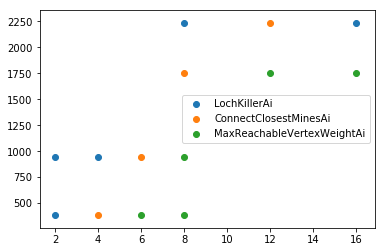

In [71]:
for winner in winners.winner.unique():
    s = winners.loc[winners.winner == winner]
    plt.scatter(
        s.num_players,
        s.map_rivers_count,
        label = winner
    )
plt.legend()